In [664]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import glob

import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report

sns.set()

In [665]:
#transformation des données en DataFrame
data = pd.read_csv(r'C:\Users\DELL\Desktop\IAproject\forestfires-.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [666]:
data.shape

(517, 12)

In [667]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.744681
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.436463
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [668]:
data.describe(include=['Float64'])

,FFMC,DMC,DC,ISI,temp,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,9.400000,6.400000,1090.840000


In [669]:
categorical_feature = data.describe(include=['O']).columns
print(list(categorical_feature))

['month', 'day']


In [670]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [671]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
month     517 non-null object
day       517 non-null object
FFMC      517 non-null float64
DMC       517 non-null float64
DC        517 non-null float64
ISI       517 non-null float64
temp      517 non-null float64
RH        517 non-null int64
wind      517 non-null float64
rain      517 non-null float64
area      517 non-null float64
target    517 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 48.5+ KB


In [672]:
# Shows the highes area in km

data.sort_values(by="area", ascending=False).head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,0
415,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,1
479,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,1
237,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,0
236,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0


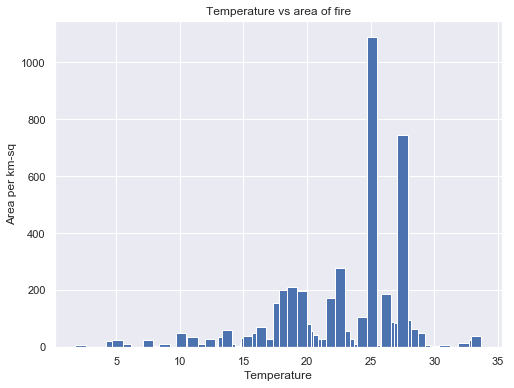

In [673]:
highest_fire_area = data.sort_values(by="area", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()

In [674]:
categorical_feature = data.describe(include=['O']).columns

# Print it in list type ...
print(list(categorical_feature))

['month', 'day']


In [675]:
numerical_feature = data.describe(include=["int64", "float64"]).columns

# Print it in list type ..
print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'target']


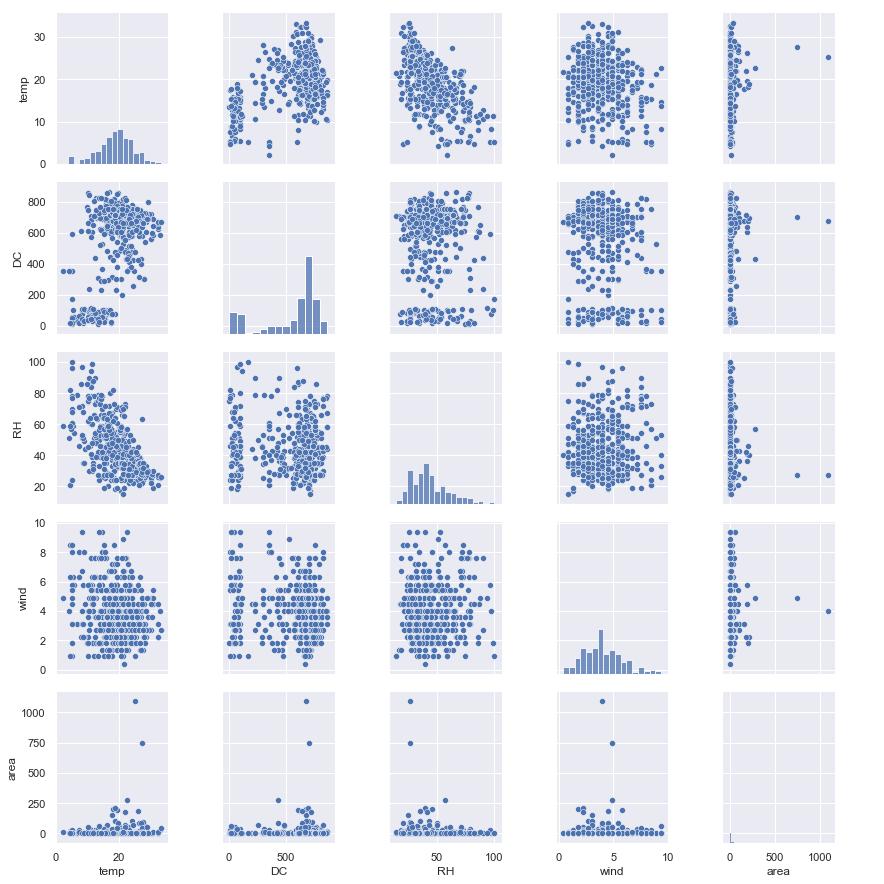

In [676]:
sns.set_style('darkgrid')
# Find the relation
# plt.subplot(data)

sns.pairplot(data[["temp","DC", "RH", "wind", "area"]])
plt.show()

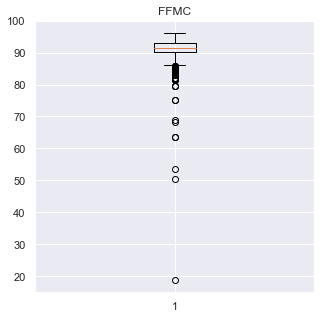

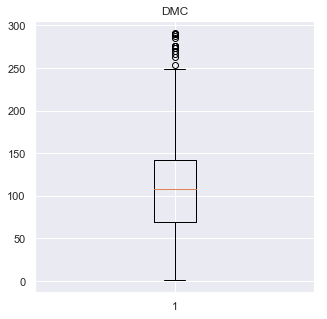

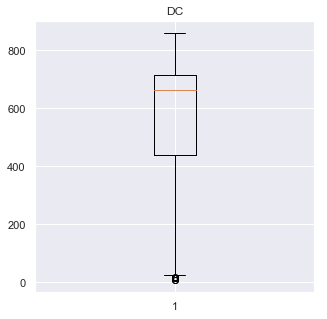

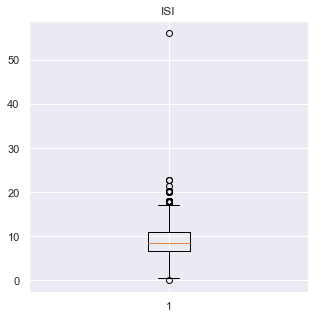

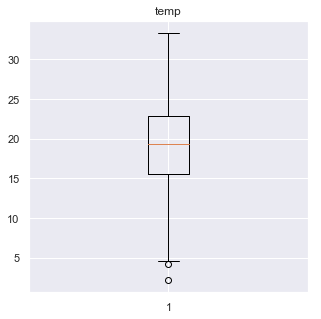

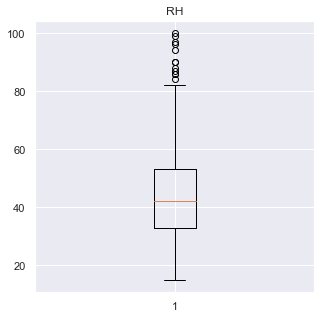

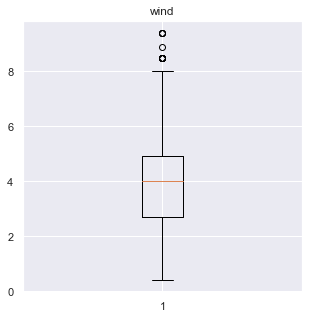

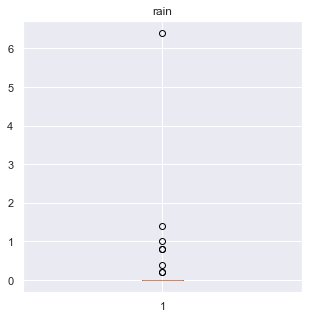

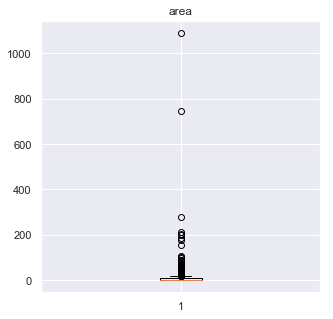

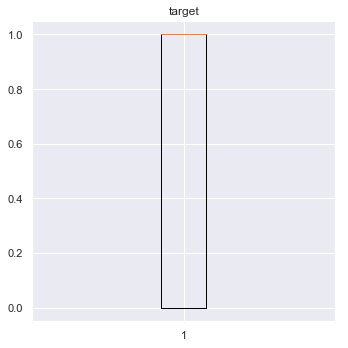

In [677]:
for idx, col  in enumerate(numerical_feature, 1):
    plt.figure(figsize=(5,5))
    
#     plt.subplot(len(numerical_feature) // 2, 3, idx)
    plt.boxplot(data[col])

    plt.title(col)
#     plt.hist(forest_df[col])

plt.tight_layout()
plt.show(plt)

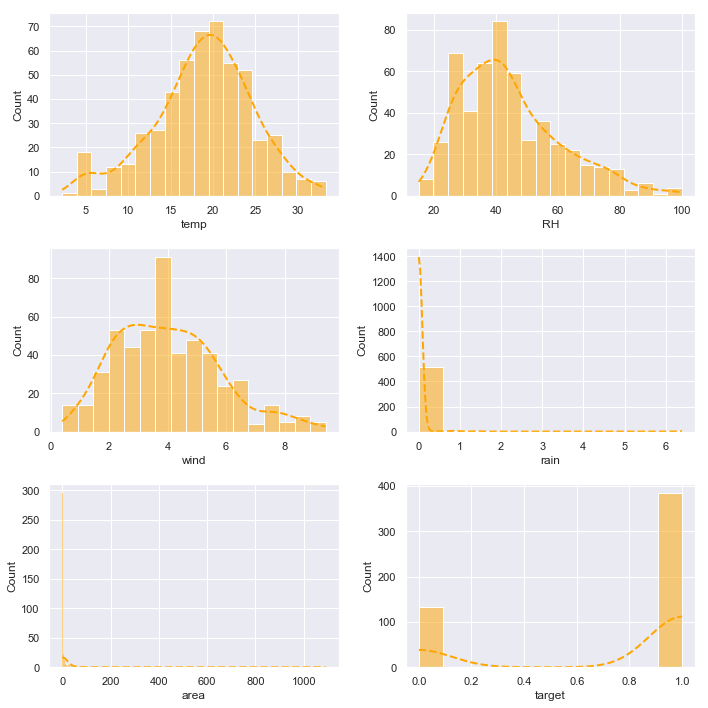

In [678]:
# visualize distribution of all numerical columns

num_cols = data.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[4:]):
    plt.sca(axs[i])
    sns.histplot(data=data, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='orange')
    
plt.tight_layout()

In [679]:
numerical_feature = data.describe(include=["int64", "float64"]).columns

# Print it in list type ..
print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'target']


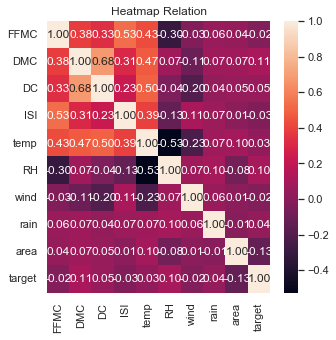

In [711]:
plt.figure(figsize=(5, 5))

plt.title("Heatmap Relation")

sns.heatmap(data[numerical_feature].corr(), annot=True, fmt='.2f');

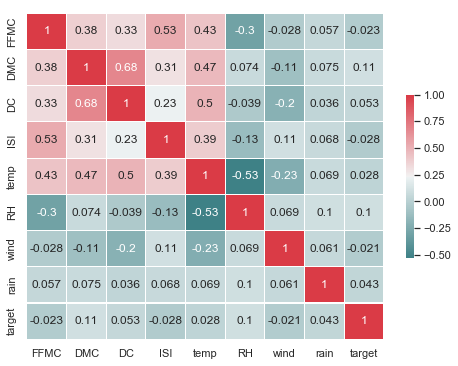

In [681]:
# Compute the correlation matrix
corr_matrix = data.drop(['area'], axis=1).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True,linewidth = 0.1,  cbar_kws={"shrink": .5})

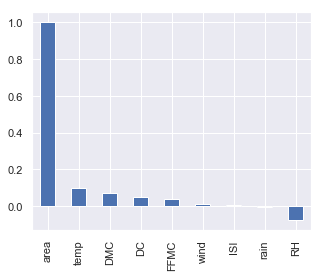

In [682]:
corr_with_isi = data.corr()['area'].sort_values(ascending=False)
plt.figure(figsize=(5,4))
corr_with_isi.drop('target').plot.bar()
plt.show();

In [683]:
df=data

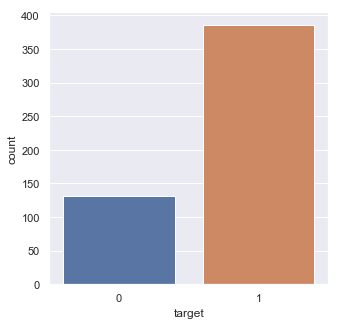

In [684]:
plt.figure(figsize = (5,5))


sns.countplot(x = "target",data = df)

plt.show()

In [685]:
X=pd.DataFrame(np.c_[data['temp'],data['DMC'],data['DC'],data['FFMC']], columns = ['temp','DMC','DC','FFMC'])
Y = data['target']


In [686]:
x= pd.DataFrame (np.c_[data['temp'],data['DMC'],data['DC'],data['FFMC']], columns = ['temp','DMC','DC','FFMC'])
x.columns = ['temp', 'DMC','DC','FFMC']
y = data['target']
y
x

,temp,DMC,DC,FFMC
0,8.2,26.2,94.3,86.2
1,18.0,35.4,669.1,90.6
2,14.6,43.7,686.9,90.6
3,8.3,33.3,77.5,91.7
4,11.4,51.3,102.2,89.3
5,22.2,85.3,488.0,92.3
6,24.1,88.9,495.6,92.3
7,8.0,145.4,608.2,91.5
8,13.1,129.5,692.6,91.0
9,22.8,88.0,698.6,92.5


In [687]:

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(387, 4)
(130, 4)
(387,)
(130,)


In [688]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [689]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.43118626922929104
le score R2 est 0.016831723520059017




In [690]:
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 0.43531968432892343
le score R2 est 0.018809881790580074


In [691]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=pd.DataFrame(np.c_[data['FFMC'],data['temp'],data['wind']], columns = ['FFMC','temp','wind'])
Y = data['area']
 

In [692]:
#instancier modèle
model_linRegMul = LinearRegression()

In [693]:
model_linRegMul.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [694]:
precision = model_linRegMul.score(x, y)
print(precision*100)

1.7910997993610622


In [695]:
y_pred =model_linRegMul.predict(X_test)
print(y_pred)

[0.72302971 0.72462098 0.74625469 0.74754434 0.74849554 0.75305241
 0.70323814 0.74858894 0.83040037 0.70043692 0.7745412  0.69282119
 0.73597276 0.69553098 0.9261557  0.74574408 0.77064406 0.76066562
 0.68185031 0.72313739 0.66478481 0.71473337 0.69028323 0.74625649
 0.90870113 0.66343682 0.68678628 0.78273154 0.72532682 0.69247607
 0.75257814 0.81273722 0.73244046 0.76614391 0.82717751 0.77185155
 0.6930227  0.71181435 0.73791551 0.73875856 0.73195944 0.71182176
 0.71214727 0.70021728 0.71703046 0.73533767 0.90823688 0.69247567
 0.73052686 0.71204098 0.79181472 0.74242787 0.71210901 0.72773125
 0.74624729 0.6553195  0.69754034 0.85414264 0.71203057 0.73026869
 0.72769298 0.70596019 0.67566091 0.75994367 0.70668296 0.7379017
 0.7302791  0.81273762 0.68951961 0.74858653 0.71183077 0.71701264
 0.70021227 0.84932435 0.74753533 0.67110785 0.92616751 0.73588585
 0.71203717 0.71201995 0.72425958 0.7168379  0.71946635 0.69786075
 0.78295457 0.73195804 0.72312157 0.71473477 0.83154233 0.75257

In [696]:
model = KNeighborsClassifier()

In [697]:
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print('test_set :', x_test.shape)
print('train_set :', x_train.shape )

test_set : (130, 4)
train_set : (387, 4)


In [698]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model.fit(x,y)
model.score(x,y)

0.8471953578336557

In [699]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [700]:
print(classifier.score(x_test, y_test))

0.7307692307692307


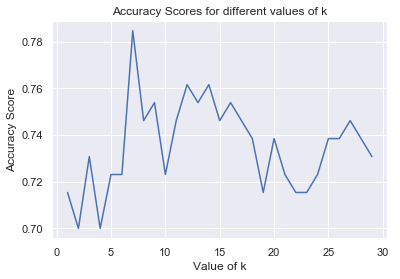

In [701]:
#chercher K le plus convenable avec cette dataset
# trouver  l'accuracy score pour k-value rangin from 1 to 30
import sklearn.metrics as metrics

k_range = list(range(1,30))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-30
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [702]:
from sklearn.metrics import r2_score

y_train_predict = model_linRegMul.predict(X_train)

r2 = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.43531968432892343
le score R2 est 0.016307243118272696




In [703]:
# K=2 c'est la valeur optimale de dataset
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean') 
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.7307692307692307


In [704]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [707]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 3, 31],
       [ 4, 92]], dtype=int64)

In [708]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn)
print(tp)
print(fn)
print(fp)

3
92
4
31


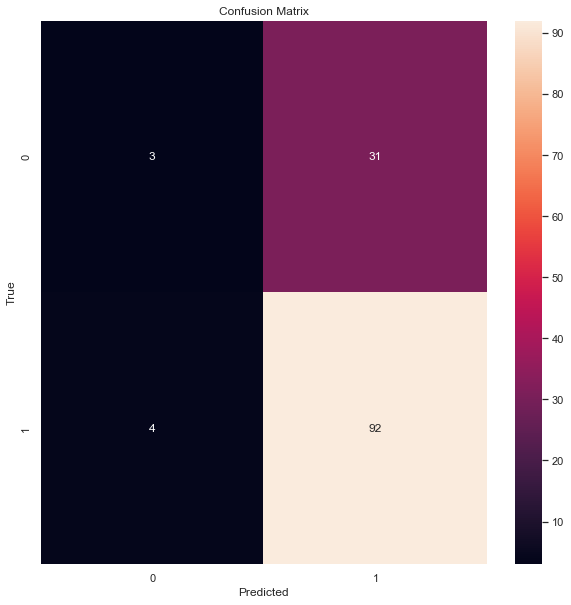

In [705]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [706]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.09      0.15        34
           1       0.75      0.96      0.84        96

   micro avg       0.73      0.73      0.73       130
   macro avg       0.59      0.52      0.49       130
weighted avg       0.66      0.73      0.66       130



In [709]:
from azureml.core import Workspace
ws = Workspace(subscription_id="<subscription_id>",
               resource_group="<resource_group>",
               workspace_name="<workspace_name>")

ModuleNotFoundError: No module named 'azureml'